In [20]:
import pandas as pd
import scipy.stats as scs
import numpy as np
import matplotlib.pyplot as plt
import sys

In [18]:
df = pd.read_csv('admissions.csv')

In [38]:
df.head(5)

,family_income,gpa,parent_avg_age,family_income_cat
0,31402.0,3.18,32,medium
1,32247.0,2.98,48,medium
2,34732.0,2.85,61,medium
3,53759.0,3.39,62,high
4,50952.0,3.10,45,high


In [21]:
#computed the covariance between gpa, parent avg age and family income
def covariance(x1, x2):
    return np.sum((x1 - np.mean(x1)) * (x2 - np.mean(x2))) / (len(x1) - 1.)
   
print (covariance(df.family_income, df.gpa))
print (covariance(df.family_income, df.parent_avg_age))
print (covariance(df.gpa, df.parent_avg_age))

#Check your results
df.cov()

4015.2990850274814
-1226.3262797340346
-0.028785259926177496


,family_income,gpa,parent_avg_age
family_income,3.329410e+08,4015.299085,-1226.326280
gpa,4.015299e+03,0.087891,-0.028785
parent_avg_age,-1.226326e+03,-0.028785,112.977442


In [22]:
def correlation(x1, x2):
    std_prod = np.std(x1) * np.std(x2)
    covar = covariance(x1, x2)
    return covar / std_prod

print (correlation(df.family_income, df.gpa))
print (correlation(df.family_income, df.parent_avg_age))
print (correlation(df.gpa, df.parent_avg_age))

#Checking the results
df.corr()


0.7423369244946509
-0.006323623565167678
-0.00913568508579032


,family_income,gpa,parent_avg_age
family_income,1.000000,0.742269,-0.006323
gpa,0.742269,1.000000,-0.009135
parent_avg_age,-0.006323,-0.009135,1.000000


In [23]:
# Categorize the family income
def income_category(income):
    if income <= 26832:
        return 'low'
    elif income <= 37510:
        return 'medium'
    else:
        return 'high'
# Apply the categorization and define a new column 
df['family_income_cat'] = df.family_income.apply(income_category)

# Alternatively, we can use pandas' cut function to bin the data
max_income = df['family_income'].max()
df['family_income_cat']=pd.cut(np.array(df['family_income']), [0,26382,37510,max_income], 
                               labels=["low","medium","high"])

                            

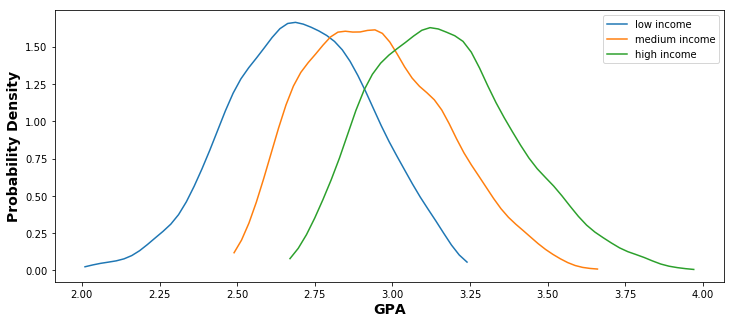

In [24]:
# The conditional distribution of GPA given an income class
low_income_gpa = df[df['family_income_cat'] == 'low'].gpa
medium_income_gpa = df[df['family_income_cat'] == 'medium'].gpa
high_income_gpa = df[df['family_income_cat'] == 'high'].gpa

# Plotting the distributions
from scipy.stats.kde import gaussian_kde
def plot_smooth(gpa_samp, label):
    my_pdf = gaussian_kde(gpa_samp)
    x = np.linspace(min(gpa_samp) , max(gpa_samp))
    plt.plot(x, my_pdf(x), label=label)
 
fig = plt.figure(figsize=(12, 5))
plot_smooth(low_income_gpa, 'low income')
plot_smooth(medium_income_gpa, 'medium income')
plot_smooth(high_income_gpa, 'high income')
plt.xlabel('GPA', fontsize=14, fontweight='bold')
plt.ylabel('Probability Density', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

In [25]:
# The 90th percentile GPA for each class
print ('90th percentile GPA for low income class', np.percentile(low_income_gpa, 90))
print ('90th percentile GPA for medium income class', np.percentile(medium_income_gpa, 90))
print ('90th percentile GPA for high income class', np.percentile(high_income_gpa, 90))


90th percentile GPA for low income class 2.99
90th percentile GPA for medium income class 3.25
90th percentile GPA for high income class 3.49


In [26]:
# The 50th percentile GPA for each class
print('50th percentile GPA for low income class', np.percentile(low_income_gpa, 50))
print('50th percentile GPA for medium income class', np.percentile(medium_income_gpa, 50))
print('50th percentile GPA for high income class',np.percentile(high_income_gpa, 50))

50th percentile GPA for low income class 2.7
50th percentile GPA for medium income class 2.93
50th percentile GPA for high income class 3.15


In [27]:
# The 25th percentile GPA for each class
print('25th percentile GPA for low income class', np.percentile(low_income_gpa, 25))
print('25th percentile GPA for medium income class', np.percentile(medium_income_gpa, 25))
print('25th percentile GPA for high income class',np.percentile(high_income_gpa, 25))

25th percentile GPA for low income class 2.55
25th percentile GPA for medium income class 2.77
25th percentile GPA for high income class 2.99


In [28]:
#variation from medium to low class for 90th percentile
np.percentile(medium_income_gpa, 90) -np.percentile(low_income_gpa, 90)


0.25999999999999979

In [29]:
#variation from high to med class for 90th percentile
np.percentile(high_income_gpa, 90)  - np.percentile(medium_income_gpa, 90)

0.24000000000000021

In [30]:
#variation from medium to low class for 50th percentile

np.percentile(medium_income_gpa, 50) - np.percentile(low_income_gpa, 50)

0.22999999999999998

In [31]:
#variation from medium to low class for 50th percentile

np.percentile(medium_income_gpa, 50) - np.percentile(low_income_gpa, 50)

0.22999999999999998

In [32]:
#variation from medium to low for 25th percentile
np.percentile(medium_income_gpa, 25) - np.percentile(low_income_gpa, 25)

0.2200000000000002

In [33]:
#variation from medium to low for 25th percentile
np.percentile(medium_income_gpa, 25) - np.percentile(low_income_gpa, 25)

0.2200000000000002

In [34]:
#variation from high to medium for 25th percentile
np.percentile(high_income_gpa, 25) - np.percentile(medium_income_gpa, 25)

0.2200000000000002

In [35]:
#gpa variance between class 90th percentile
(0.2599 + 0.2400)/2

0.24995

In [36]:
# gpa variance between class 50th percentile
(0.2299 + 0.21999 )/2

0.224945

In [37]:
#gpa variance between class 25th percentile
(0.2200 + 0.2200)/2

0.22